In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def multadd(x,y):
# Sum of element-wise product of matrices x and y
    return np.sum(np.multiply(x,y))


image_cv2 = cv2.imread('nopadron.png',cv2.IMREAD_GRAYSCALE)
image = np.array(image_cv2)

In [4]:
# 3x3 Kernel used for filtering (size must be an odd number)
kernel=[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

# The kernel must be flipped to operate with it. In case it's 
# symmetric, this does nothing
kernel=np.flipud(np.fliplr(kernel))

In [5]:
# Number of padded pixels on each side 
pd_len=(np.shape(kernel)[0]-1)//2

# Pad with zeros on the outer border to produce a filtered image
# with the same size as the original
pd_image = np.pad(image, pad_width=pd_len,\
                  mode='constant', constant_values=0)

In [6]:
image.shape

(384, 512)

In [9]:
pd_image.shape

(386, 514)

In [7]:
# VERY IMPORTANT: when working with encrypted signals, convert to 
# integer, to avoid problems in the encryptions. Here it's innocuous.
pd_image=pd_image.astype(int)

# Create container for output image    
out_image=np.zeros(np.shape(image))    
# Do the convolution
for i in range(np.shape(image)[0]):
    for j in range(np.shape(image)[1]):
        imblock=pd_image[i:i+2*pd_len+1,j:j+2*pd_len+1]
        out_image[i,j]=multadd(imblock,kernel)

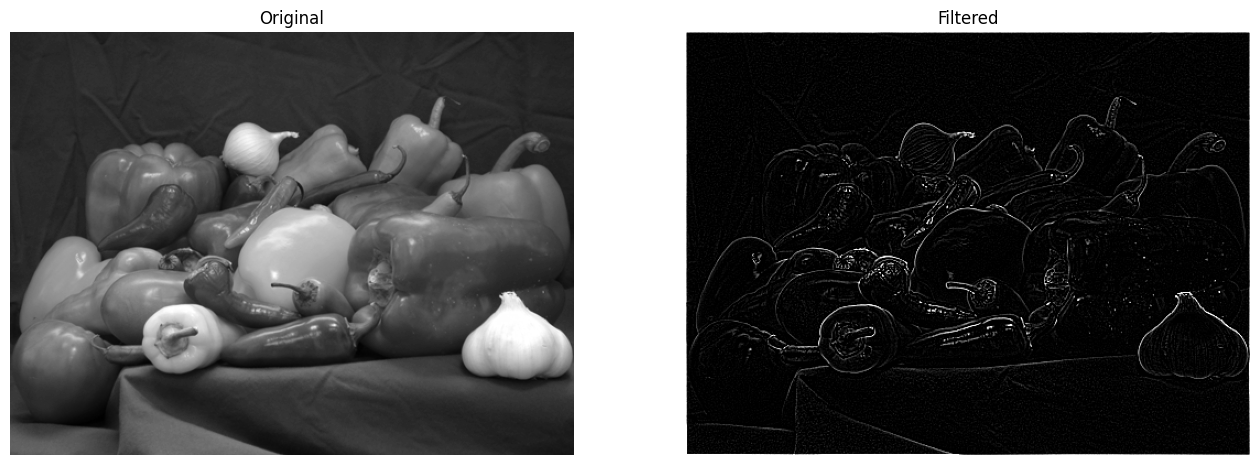

In [8]:
# Convert to values in range [0,255] by saving 
cv2.imwrite('filtered.png',out_image)
out_image=cv2.imread('filtered.png')
fig = plt.figure(figsize=(16, 25))

ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original')
ax1.imshow(image,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Filtered')
ax2.imshow(out_image)
